# Análisis exploratorio de datos (Python) #


### Importar los archivos:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st

In [2]:
project_sql_01=pd.read_csv('moved_project_sql_result_01.csv')

In [3]:
project_sql_04=pd.read_csv('moved_project_sql_result_04.csv')

### Estudiar los datos que contienen:

In [4]:
project_sql_01.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


contiene los siguientes datos:

company_name: nombre de la empresa de taxis

trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

In [5]:
project_sql_04.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


contiene los siguientes datos:

dropoff_location_name: barrios de Chicago donde finalizaron los viajes

average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

### Asegurarte de que los tipos de datos sean correctos:

In [6]:
project_sql_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
project_sql_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


### Identificar los 10 principales barrios en términos de finalización del recorrido.

In [8]:
top_ten_location=project_sql_04.sort_values('average_trips', ascending=False ).head(10)
top_ten_location

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones.

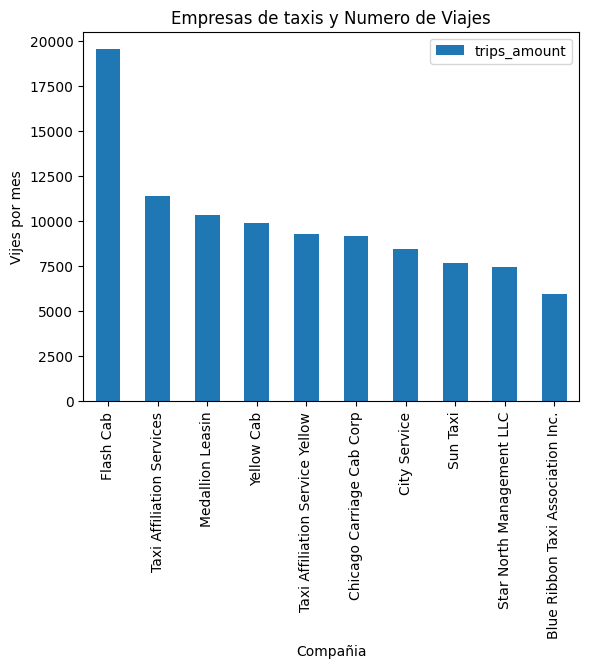

In [9]:
top_ten_company=project_sql_01.sort_values('trips_amount', ascending=False ).head(10)
top_ten_company.plot(kind='bar',
                    title='Empresas de taxis y Numero de Viajes',
                    x='company_name',
                    y='trips_amount',
                    xlabel='Compañia',
                    ylabel='Vijes por mes'
                    )
plt.show()

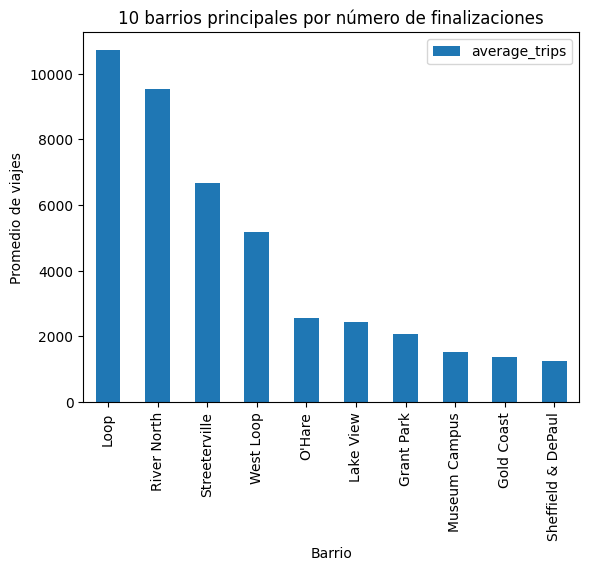

In [10]:
top_ten_location.plot(kind='bar',
                    title='10 barrios principales por número de finalizaciones',
                    x='dropoff_location_name',
                    y='average_trips',
                    xlabel='Barrio',
                    ylabel='Promedio de viajes'
                    )
plt.show()

### Sacar conclusiones basadas en cada gráfico y explicar los resultados.

En la gráfica “Empresas de taxis y Número de Viajes” Podemos ver que el mercado está prácticamente movido por “Flash Cab” cubriendo caso 20,000 viajes y que la verdadera competencia se encuentra entre las tres empresas “Taxi Affiliation Services”,”Medallion Leasin” y “Yellow Cab”

En la gráfica “10 barrios principales por número de finalizaciones” vemos que el barrio mas transcurrido es “Loop” representando un total de poco más de 10,000 finalizaciones un poco más de la mitad del total de viajes que efectuaron taxis de la empresa “Flash Cab”.


Sabiendo esto no me atrevería a decir aun que dicha empresa cubre tal territorio , habría que investigar y recopilar mas información.


# Prueba de hipótesis (Python) #

In [11]:
project_sql_07=pd.read_csv('moved_project_sql_result_07.csv')
project_sql_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [12]:
project_sql_07['start_ts']=pd.to_datetime(project_sql_07['start_ts'])

In [13]:
project_sql_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [14]:
project_sql_07['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

Solo tenemos dos condicionales 

In [15]:
conditions=['Good','Bad']

In [16]:
for condition in conditions:
    tiempo=project_sql_07[project_sql_07['weather_conditions']==condition]['duration_seconds'].sum()
    print(f'El timepo total de viaje con {condition} condiciones es de {tiempo}' )

El timepo total de viaje con Good condiciones es de 1775712.0
El timepo total de viaje con Bad condiciones es de 436897.0


Hipotesis a comprobar :"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [17]:
alpha=0.5

In [18]:
sample_1=project_sql_07.query('weather_conditions=="Good"')['duration_seconds']
sample_2=project_sql_07.query('weather_conditions=="Bad"')['duration_seconds']

In [19]:
resultado = st.ttest_ind(sample_1,sample_2, equal_var=False)
print (f'p-value:{resultado.pvalue}')

p-value:6.738994326108734e-12


In [20]:
if resultado.pvalue<alpha:
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

Podemos rechazar la hipotesis nula
